In [68]:
import numpy as np

def f(x):
    return np.sin(np.pi * x)
    #return 1 - 4*(x-0.5)**2

def nonuniform_grid(num_points,left_pt,right_pt,is_non_unif=True):
    grid = np.array([(float(is_non_unif)/(num_points+1-0.5*(num_points+2))**2)*((i+1)-0.5*(num_points+2))**2 + 1 for i in range(num_points+1)])
    grid *= (right_pt-left_pt)/sum(grid)
    final_grid = np.zeros(num_points+2)
    final_grid[0] = left_pt
    for i in range(1,num_points+1) :
        final_grid[i] = final_grid[i-1]+grid[i-1]
    final_grid[num_points+1] = right_pt
    return grid, final_grid

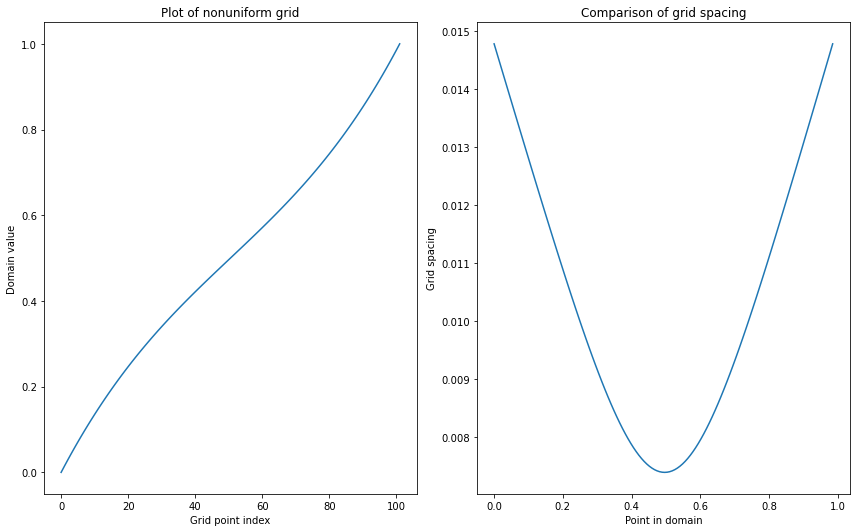

In [69]:
import matplotlib.pyplot as plt

num_points = 100
h_vals, grid = nonuniform_grid(num_points,0,1)
#grid = np.linspace(0,1,num_points+2)
#h_vals = np.diff(grid)

plt.figure(figsize=(12,7.5))

# Plot 1
plt.subplot(1,2,1)
plt.plot(grid)
plt.title("Plot of nonuniform grid")
plt.xlabel("Grid point index")
plt.ylabel("Domain value")

# Plot 2
plt.subplot(1,2,2)
plt.plot(grid[:-1],h_vals)
plt.title("Comparison of grid spacing")
plt.xlabel("Point in domain")
plt.ylabel("Grid spacing")

plt.tight_layout()
plt.show()

In [70]:
# Construct the coefficient matrix
A = np.zeros((num_points,num_points))

for i in range(num_points) :
    A[i,i] = -2./(h_vals[i]*h_vals[i+1])
    
for i in range(num_points-1) :
    A[i+1,i] = 2./(h_vals[i+1]*(h_vals[i+1]+h_vals[i+2]))
    A[i,i+1] = 2./(h_vals[i+1]*(h_vals[i]+h_vals[i+1]))

In [71]:
# Check the resulting matrix's form
A

array([[ -9343.45827382,   4718.44170984,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [  4813.73429872,  -9724.66514761,   4910.93084888, ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,   5010.04771244, -10121.16880196, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
        -10121.16880196,   5010.04771244,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
          4910.93084888,  -9724.66514761,   4813.73429872],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,   4718.44170984,  -9343.45827382]])

In [72]:
# Solve the discrete system

bc_left = 0
bc_right = 0

rhs = f(grid[1:-1])
rhs[0] -= (2/(h_vals[0]*(h_vals[0]+h_vals[1])))*bc_left
rhs[-1] -= (2/(h_vals[-1]*(h_vals[-2]+h_vals[-1])))*bc_right

u = np.linalg.solve(A,rhs)

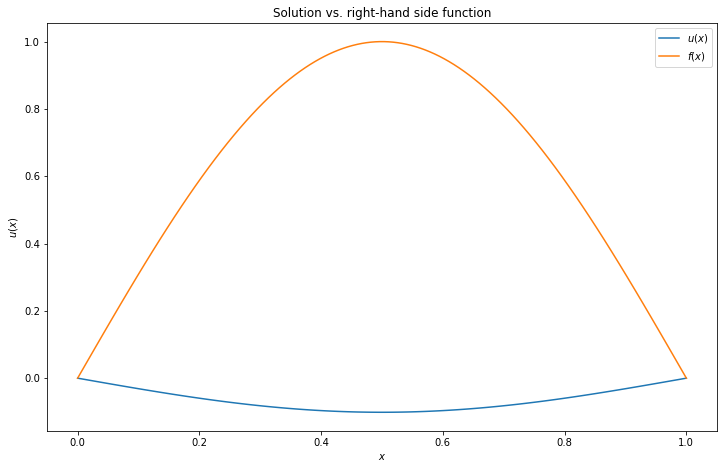

In [73]:
# Add boundary conditions

U = np.append(np.array([bc_left]),np.append(u,bc_right))
RHS = np.append(np.array([bc_left]),np.append(rhs,bc_right))

plt.figure(figsize=(12,7.5))
plt.plot(grid,U,label="$u(x)$")
plt.plot(grid,RHS,label="$f(x)$")
plt.title("Solution vs. right-hand side function")
plt.xlabel("$x$")
plt.ylabel("$u(x)$")
plt.legend()

plt.show()

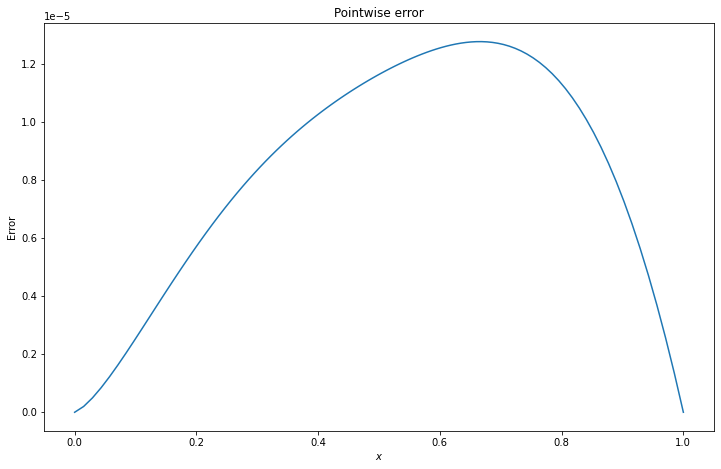

In [74]:
# Check error

def error_check(approx,true,grid) :
    error_grid = np.append(0.5*(grid[:-1]+grid[1:]),grid[-1])
    return np.sqrt(np.multiply(error_grid,(approx-true)**2))

true_sol = -(1/np.pi**2)*np.sin(np.pi*grid)

error = error_check(U,true_sol,grid)

plt.figure(figsize=(12,7.5))
plt.plot(grid,error)
plt.title("Pointwise error")
plt.ylabel("Error")
plt.xlabel("$x$")

plt.show()

In [75]:
# L2 error
sum(error)

0.000910607929436465